In [2]:
import tensorflow as tf
import zipfile, os
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /content/rockpaperscissors.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import shutil

In [8]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [9]:
zip_ref.extractall('/rockpaperscissors')

In [11]:
zip_ref.close()

In [10]:
base_dir = '/rockpaperscissors/rockpaperscissors/'

In [12]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [13]:
os.listdir('/rockpaperscissors/rockpaperscissors/')

['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']

In [14]:
# membuat direktori rock pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

In [15]:
train_paper_dir = os.path.join(train_dir, 'paper')

In [16]:
train_scissors_dir = os.path.join(train_dir, 'scissors')

In [17]:
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [18]:
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [19]:
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [20]:
train_datagen = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=20,
                 horizontal_flip=True,
                 shear_range=0.2,
                 fill_mode='nearest')

In [21]:
test_datagen = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=20,
                 horizontal_flip=True,
                 shear_range=0.2,
                 fill_mode='nearest')

In [22]:
import splitfolders
splitfolders.ratio('/rockpaperscissors/rockpaperscissors/rps-cv-images', output='/rockpaperscissors/rockpaperscissors', seed=1337, ratio=(.6, .4))

In [23]:
os.listdir('/rockpaperscissors/rockpaperscissors/train/')

['paper', 'rock', 'scissors']

In [24]:
os.listdir('/rockpaperscissors/rockpaperscissors/val/')

['paper', 'rock', 'scissors']

In [25]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical')  # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 1312 images belonging to 3 classes.


In [26]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # direktori data validasi
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,  # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode='categorical')

Found 876 images belonging to 3 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25


25/25 - 51s - loss: 1.1148 - accuracy: 0.3738 - val_loss: 0.9352 - val_accuracy: 0.5813 - 51s/epoch - 2s/step
Epoch 2/25
25/25 - 44s - loss: 0.7649 - accuracy: 0.6875 - val_loss: 0.7866 - val_accuracy: 0.7000 - 44s/epoch - 2s/step
Epoch 3/25
25/25 - 40s - loss: 0.4608 - accuracy: 0.8188 - val_loss: 0.5389 - val_accuracy: 0.8687 - 40s/epoch - 2s/step
Epoch 4/25
25/25 - 43s - loss: 0.2988 - accuracy: 0.8975 - val_loss: 0.2597 - val_accuracy: 0.8875 - 43s/epoch - 2s/step
Epoch 5/25
25/25 - 40s - loss: 0.2024 - accuracy: 0.9388 - val_loss: 0.3201 - val_accuracy: 0.9000 - 40s/epoch - 2s/step
Epoch 6/25
25/25 - 49s - loss: 0.2361 - accuracy: 0.9212 - val_loss: 0.2716 - val_accuracy: 0.9187 - 49s/epoch - 2s/step
Epoch 7/25
25/25 - 39s - loss: 0.1817 - accuracy: 0.9400 - val_loss: 0.2359 - val_accuracy: 0.9187 - 39s/epoch - 2s/step
Epoch 8/25
25/25 - 32s - loss: 0.1731 - accuracy: 0.9375 - val_loss: 0.1156 - val_accuracy: 0.9563 - 32s/epoch - 1s/step
Epoch 9/25
25/25 - 33s - loss:

In [34]:
model.save('rockpaperscrissors.h5')

In [31]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [30]:
%matplotlib inline

In [36]:
from tensorflow.keras.models import load_model


1/1 [==============================] - 0s 243ms/step
The predicted class for the image is: Scissors


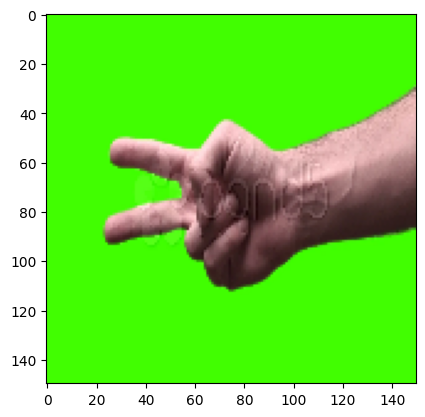

In [42]:
# Load the pre-trained model
model = load_model('rockpaperscrissors.h5')  # Replace with the actual path to your model file

# Function to predict the class of an image
def predict_class(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image data

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)

    return class_index

# Example usage
image_path = 'test/scrissors2.jpg'  # Replace with the actual path to your image file
predicted_class = predict_class(image_path)

# Map the class index to the corresponding class label
class_labels = ['Paper', 'Rock', 'Scissors']
predicted_label = class_labels[predicted_class]

# Display the result
print(f'The predicted class for the image is: {predicted_label}')

# Display the image
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
plt.show()